In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Fri Dec  1 11:31:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.6/646.6 kB 12.9 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 395, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://d

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="cNkXiFJXGg6BvVEVs0Qj")
project = rf.workspace("bishal-hazarika-w0hcw").project("docking-station-detection-kn7ni")
dataset = project.version(1).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna
    Found existin

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.221, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Docking-Station-Detection-1 in yolov8:: 100%|██████████| 2350/2350 [00:00<00:00, 9983.87it/s]


In [ ]:
!yolo task = detect mode = train model = yolov8m.pt data = {dataset.location}/data.yaml epochs = 50 batch=16 imgsz=640

Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Docking-Station-Detection-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

In [7]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!cp -r /content/runs/detect /content/drive/MyDrive/Colab Notebooks/UAV_DockingStation_Project/YOLORUN50

cp: target 'Notebooks/UAV_DockingStation_Project/YOLORUN50' is not a directory


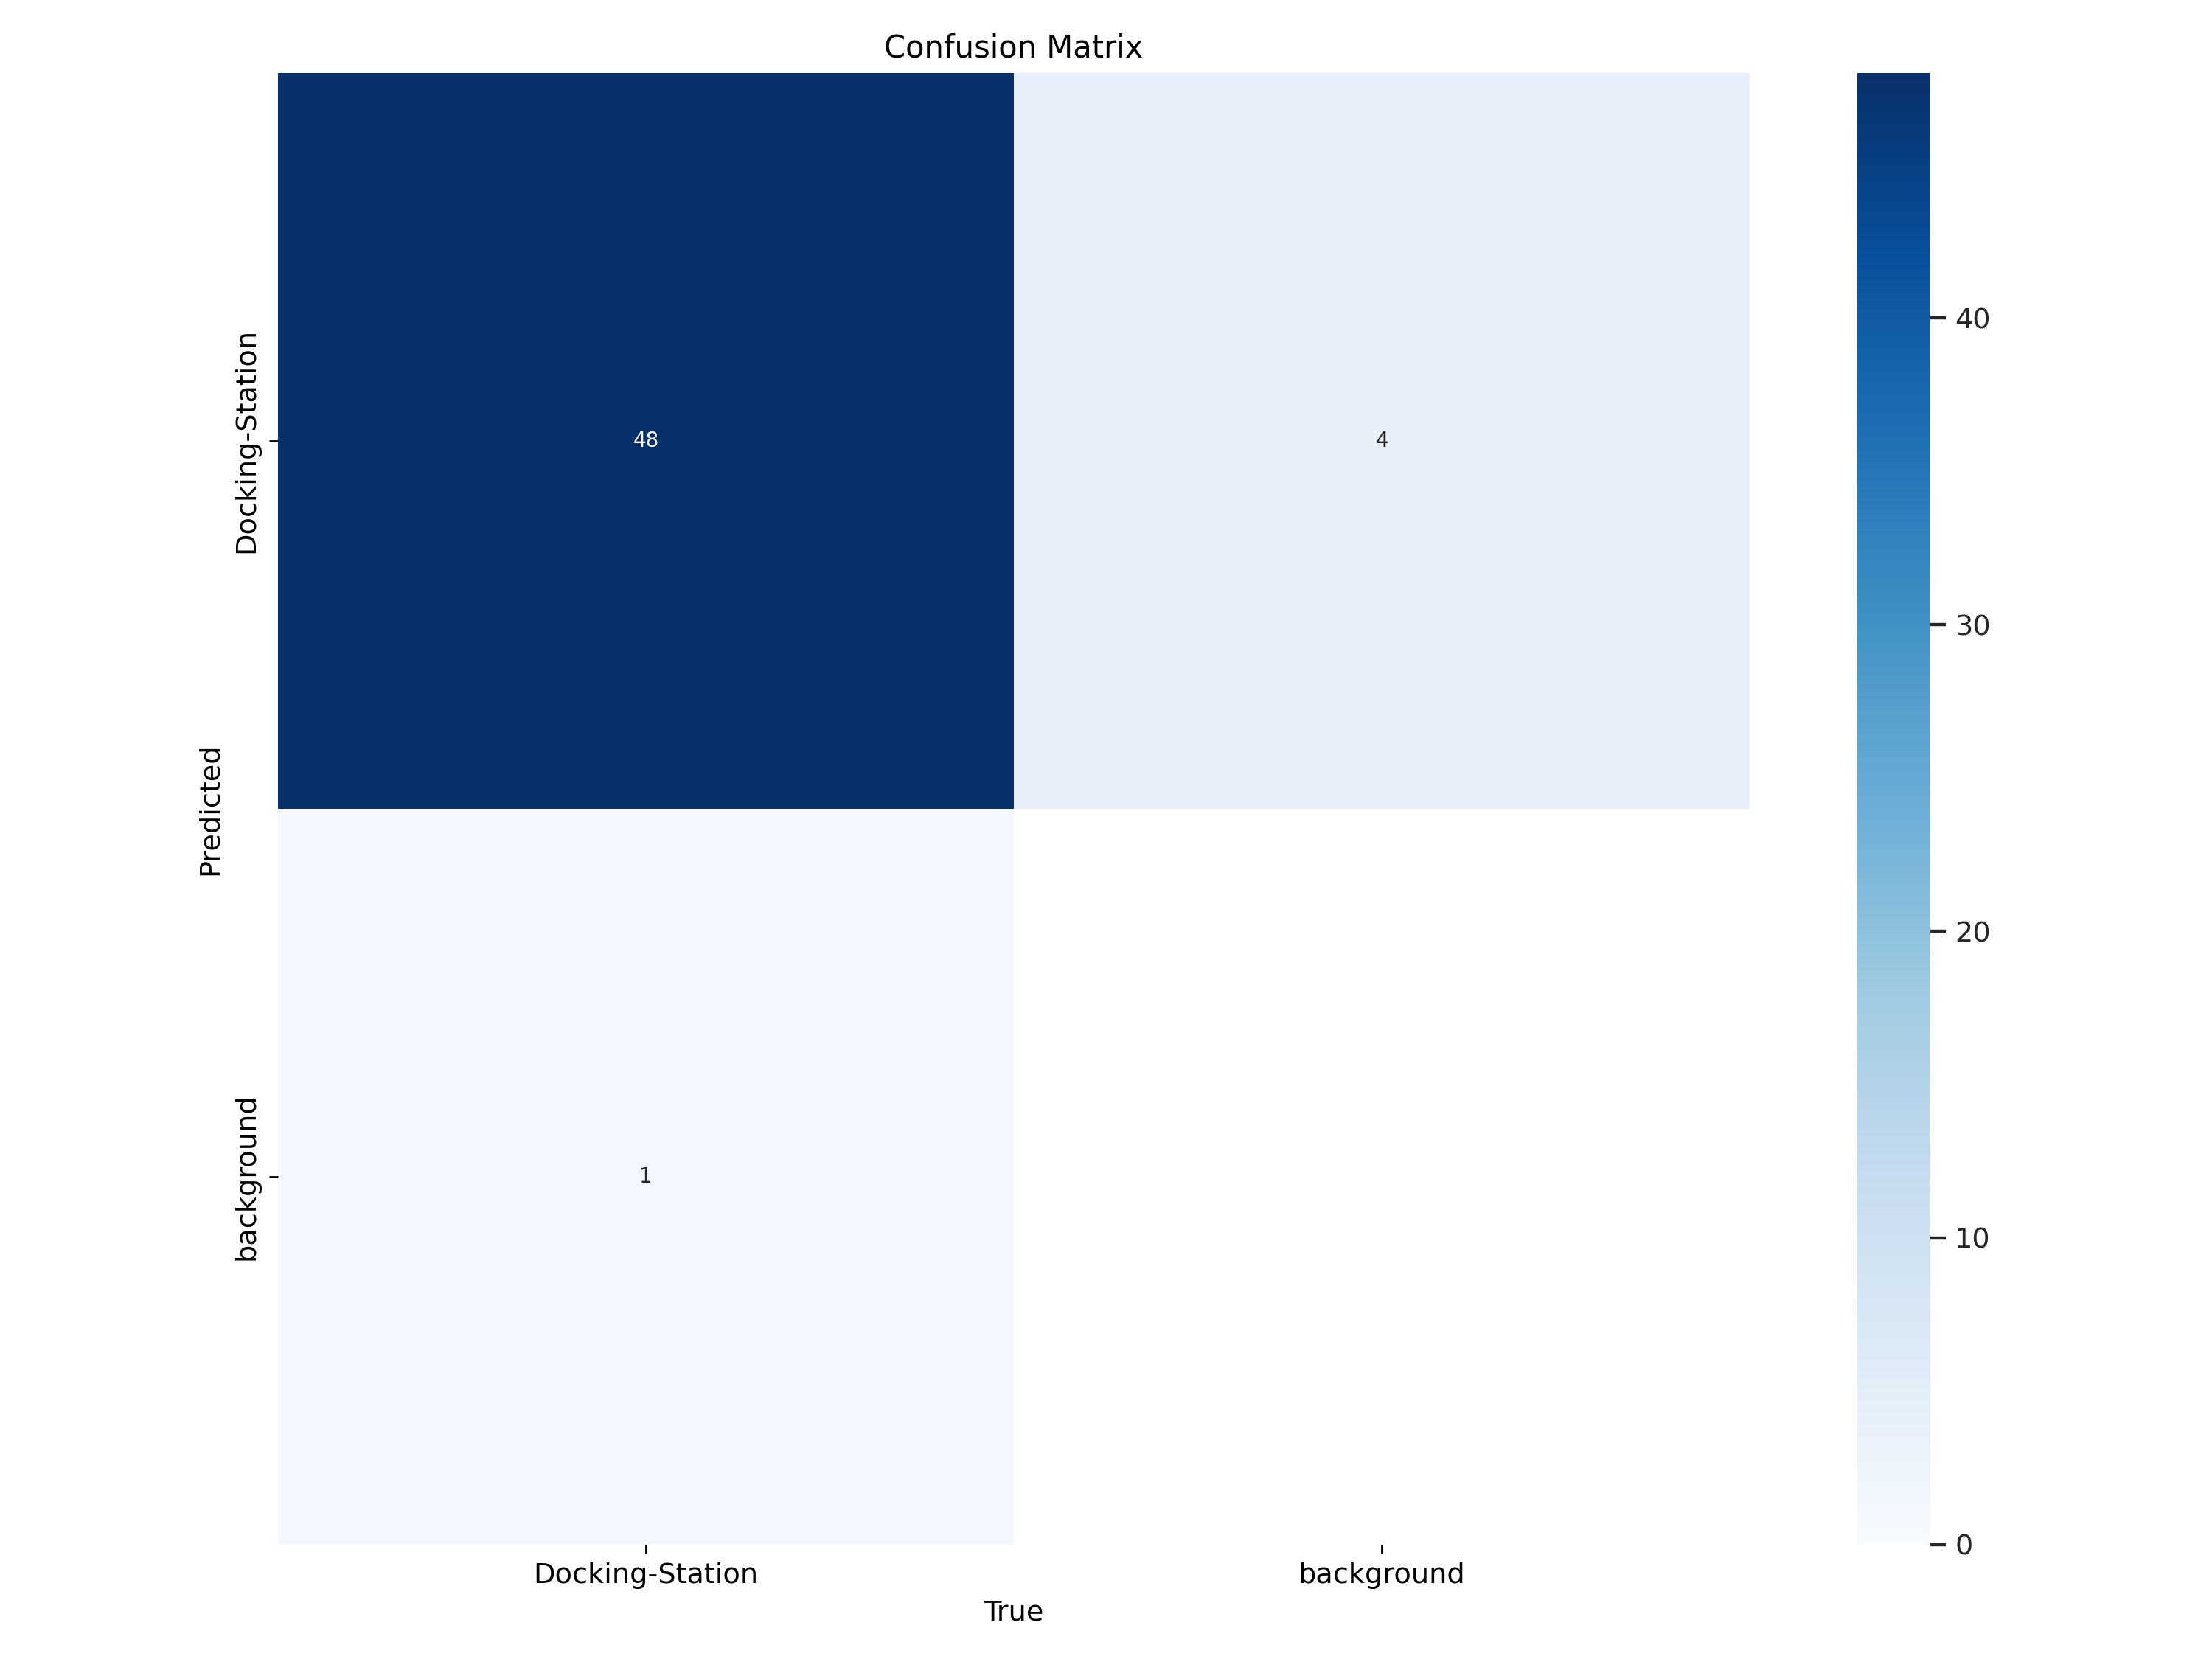

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width = 600)

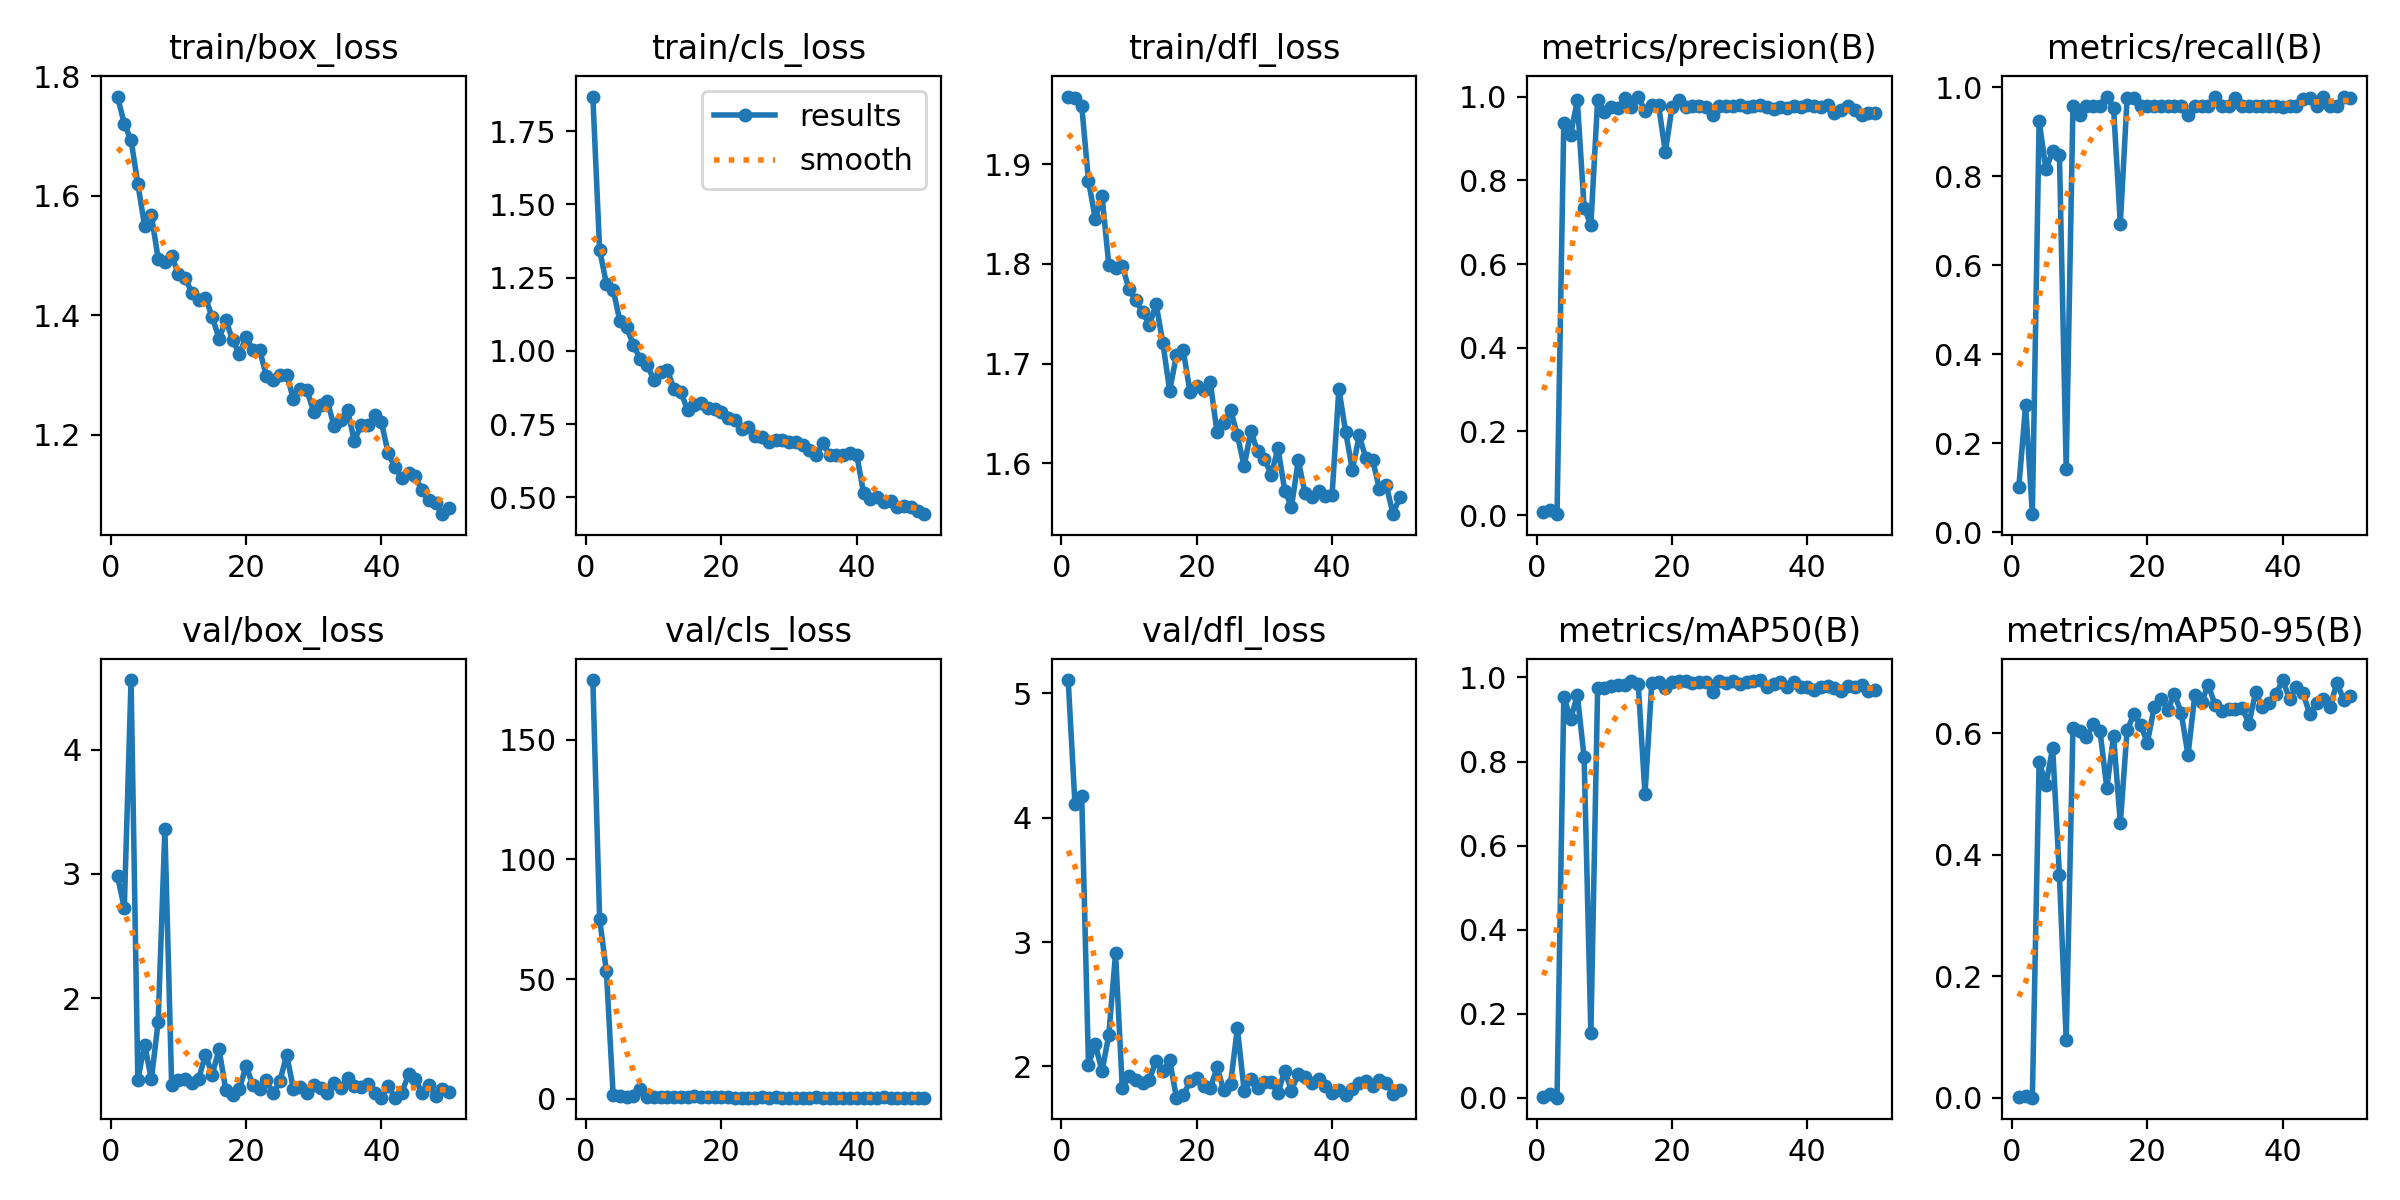

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width = 600)

In [ ]:
!yolo task = detect mode = val model = /content/runs/detect/train/weights/best.pt data = {dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Docking-Station-Detection-1/valid/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100% 45/45 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.11it/s]
                   all         45         49      0.979      0.957      0.977      0.685
Speed: 2.2ms preprocess, 30.5ms inference, 0.0ms loss, 8.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task = detect mode = predict model = /content/runs/detect/train/weights/best.pt conf= 0.5 source = {dataset.location}/test/images save_txt=true save_txt

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/45 /content/Docking-Station-Detection-1/test/images/0014_jpg.rf.17cb16d6a088b4fc991641278ceb5b5d.jpg: 640x640 1 Docking-Station, 38.7ms
image 2/45 /content/Docking-Station-Detection-1/test/images/0021_jpg.rf.bc48f24fbe2d6cca61dd1720f4b2a380.jpg: 640x640 1 Docking-Station, 37.9ms
image 3/45 /content/Docking-Station-Detection-1/test/images/0022_jpg.rf.88a6b9c524cf8829e7df42da477376d6.jpg: 640x640 1 Docking-Station, 37.0ms
image 4/45 /content/Docking-Station-Detection-1/test/images/0032_jpg.rf.bedf1813af2a22c840a0cbafb6508e9d.jpg: 640x640 1 Docking-Station, 37.1ms
image 5/45 /content/Docking-Station-Detection-1/test/images/0038_jpg.rf.73101ec702affb7a88f340461252174b.jpg: 640x640 1 Docking-Station, 37.1ms
image 6/45 /content/Docking-Station-Detection-1/test/images/0041_jpg.rf.151562aa71046c5d1789b97312a73982.jpg: 

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, height = 200))
      print("/n")

Output hidden; open in https://colab.research.google.com to view.